<a href="https://colab.research.google.com/github/dineshkk15/hello-world/blob/main/Python/30_Matplotlib_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Plotting

In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  # we will use this for plotting

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Load data.

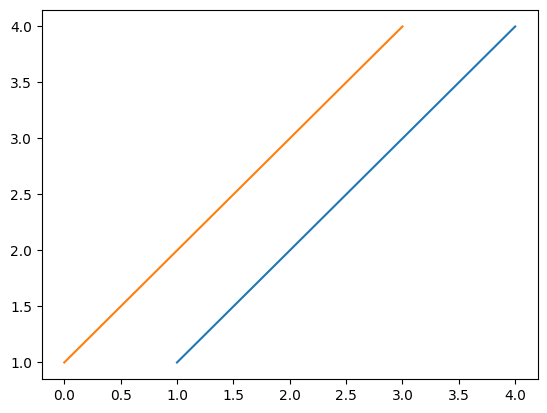

In [25]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]
z = [1, 2, 3, 4]
plt.plot(x,y,z)
plt.show()

In [32]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.job_posted_date.head()

,job_posted_date
0,2023-06-16 13:44:15
1,2023-01-14 13:18:07
2,2023-10-10 13:14:55
3,2023-07-04 13:01:41
4,2023-08-07 14:29:36


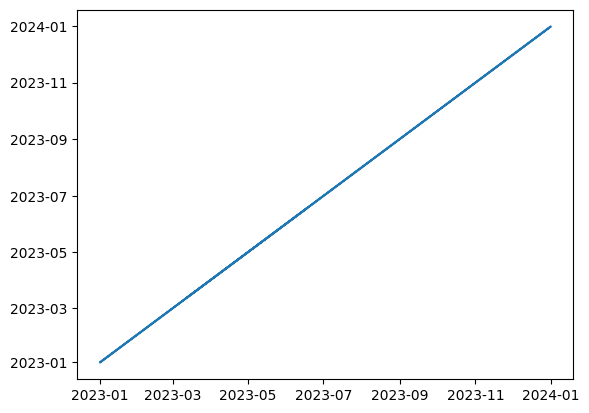

In [41]:
plt.plot('job_posted_date', 'job_posted_date', data=df)

In [48]:
date_counts = df.job_posted_date.value_counts()

date_counts = date_counts.sort_index()

In [51]:
date_counts

,count
job_posted_date,
2023-01-01 00:00:04,1
2023-01-01 00:00:07,1
2023-01-01 00:00:22,1
2023-01-01 00:00:24,1
2023-01-01 00:00:27,1
...,...
2023-12-31 23:40:18,2
2023-12-31 23:40:22,2
2023-12-31 23:40:31,2


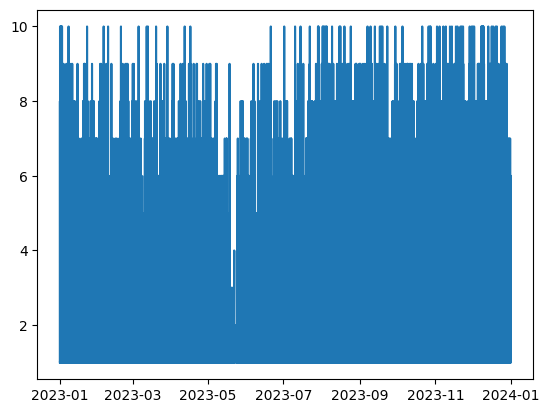

In [50]:
plt.plot(date_counts.index, date_counts)

In [52]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [56]:
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


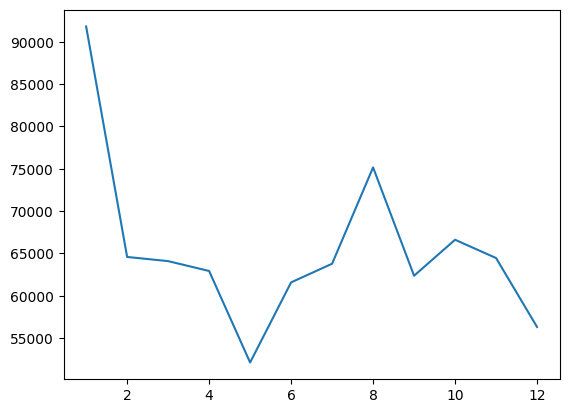

In [59]:
plt.plot(monthly_counts.index, monthly_counts)

In [64]:
pd.Series([10, 20, 30, 40, 50])

,0
0,10
1,20
2,30
3,40
4,50


In [66]:
series = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])

In [67]:
series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [68]:
series.values

array([10, 20, 30, 40, 50])

In [69]:
type(df.job_posted_date)

pandas.core.series.Series

In [78]:
job_counts = df.job_title_short.value_counts()

<BarContainer object of 10 artists>

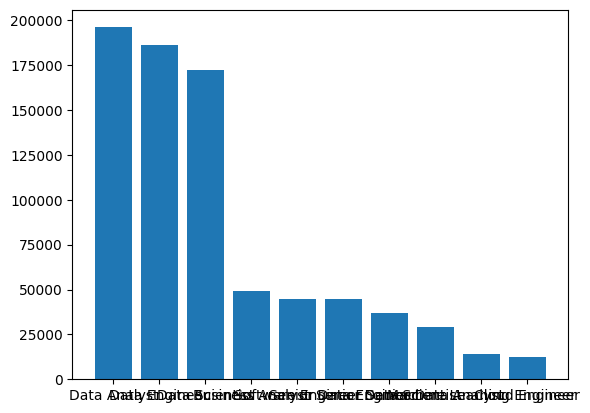

In [79]:
plt.bar(job_counts.index, job_counts.values)

<BarContainer object of 10 artists>

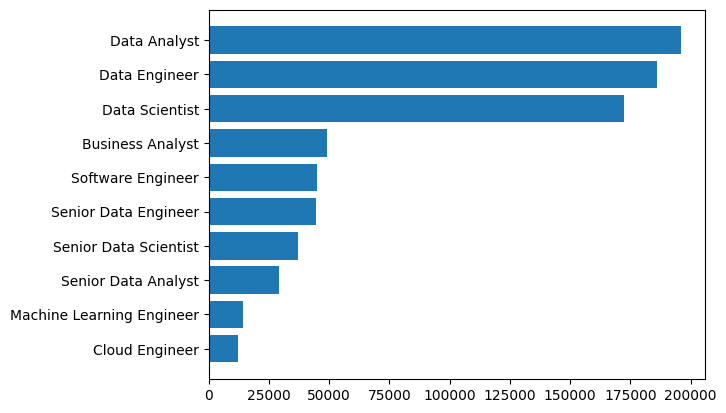

In [81]:
job_counts = job_counts.sort_values(ascending=True)
plt.barh(job_counts.index, job_counts.values)

## Line Graphs

### Notes

* `plot()` is used to draw points in a diagram.
* The default draws a line from point to point.
* It takes parameters for specifying points in the graph.
  * First parameter is the *x-axis*.
  * Second parameter is the *y-axis*.
  * Like this: `plt.plot(x-axis,y-axis)`.
* Used to display information as a series of data points called 'markers' connected by straight line segments.
* Ideal for showing trends over time or continuous data.

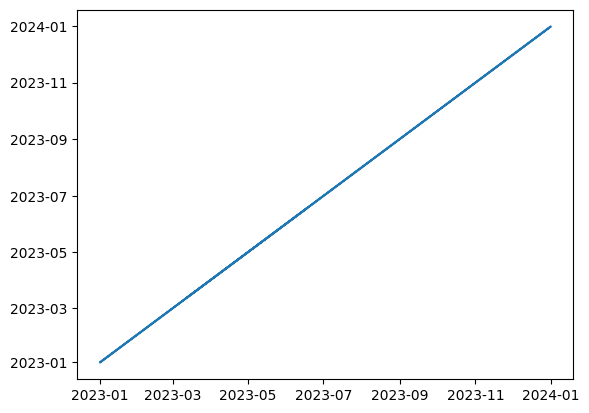

In [3]:
plt.plot(df['job_posted_date'], df['job_posted_date'])

Alternatively, we can compress what we have written:

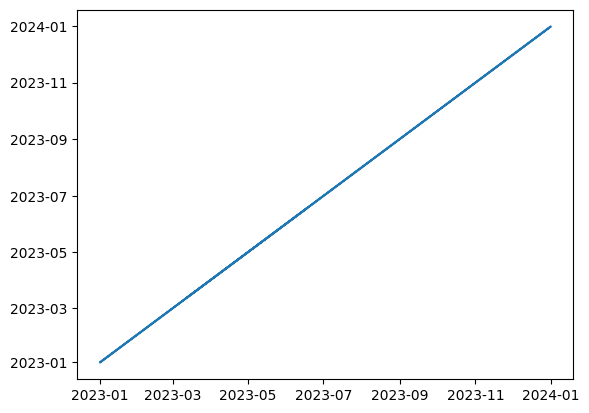

In [4]:
plt.plot('job_posted_date', 'job_posted_date', data=df)

But we want the counts of job over time.

What happens if we just aggregated by `job_posted_date`?

In [9]:
date_counts = df['job_posted_date'].value_counts()

date_counts = date_counts.sort_index()

date_counts.iloc[78567:78600]

,count
job_posted_date,
2023-02-04 12:36:47,1
2023-02-04 12:36:57,1
2023-02-04 12:37:17,1
2023-02-04 12:38:22,2
2023-02-04 12:38:26,2
2023-02-04 12:38:29,2
2023-02-04 12:38:33,1
2023-02-04 12:38:51,1
2023-02-04 12:39:02,1


### NOTE - `Series`

This `date_counts` is a `Series` object and NOT a `DataFrame`, it behaves differently then a DataFrame.

We can access the values of a `Series` object by passing the whole `Series` or specifying `Series.values`

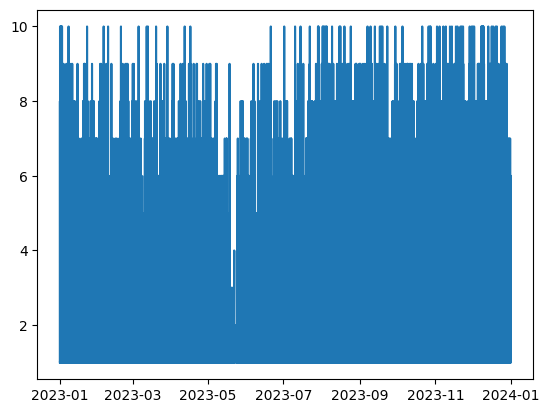

In [10]:
plt.plot(date_counts.index, date_counts)

Here we specify `Series.values`, it's a 1-D array effectively so either will work.

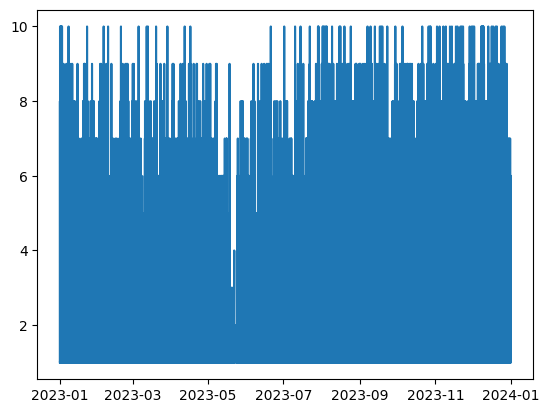

In [11]:
plt.plot(date_counts.index, date_counts.values)

This is a hot mess....

We need to extract the month using the attribute `dt` accessor and the attribute of `.month` from the `job_posted_date`.

In [12]:
# Assuming 'job_posted_date' is already converted to datetime format in the original df
df['job_posted_month'] = df['job_posted_date'].dt.month

# Group by 'month' and count the job postings
monthly_counts = df['job_posted_month'].value_counts()

# Sort the months
monthly_counts = monthly_counts.sort_index()

monthly_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


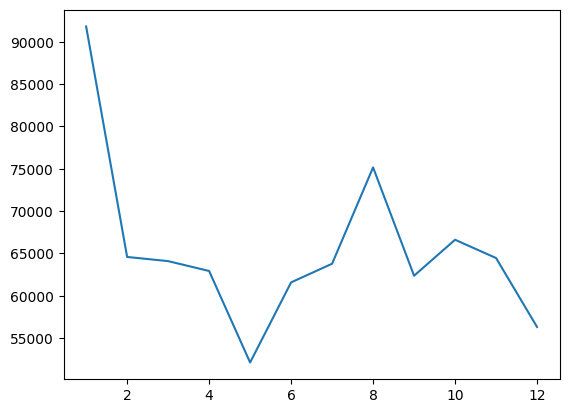

In [13]:
plt.plot(monthly_counts.index, monthly_counts)

## Series vs DataFrames in Pandas

A Series is one of the core data structures in pandas, akin to a one-dimensional array (like in NumPy) BUT with powerful, flexible indexing capabilities.

#### Core Characteristics
- One-Dimensional: It's essentially a single column of data.
- Indexed: Each element in a Series has an associated label, known as the index. The index can be numbers, dates, or even strings.
- Diverse Data Types: A Series can hold any data type—integers, strings, floats, Python objects, etc. However, all elements within a Series must be of the same data type.

In [14]:
# Creating a Series from a list
data = [10, 20, 30, 40, 50]
series = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])

In [15]:
# show how to access the values of the series using 'values'ArithmeticError
series.values

array([10, 20, 30, 40, 50])

In [16]:
series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## Bar Charts

### Notes

* Used to compare different groups or to track changes over time.
* Best for categorical data comparison.
* In Python we have two types of bar charts:
    1. Bar Plots - bars are vertical
    2. Horizontal Bar Plot - bars are horizontal

### Bar Plot

#### Notes

* `plt.bar()` for vertical bar plots.
* Syntax: `plt.bar(categories, values)`
* The bars are vertical.

 Then we get the value counts of the job titles for the filtered DataFrame.

In [17]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df['job_title_short'].value_counts()

job_counts

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


Now let's plot `job_counts`

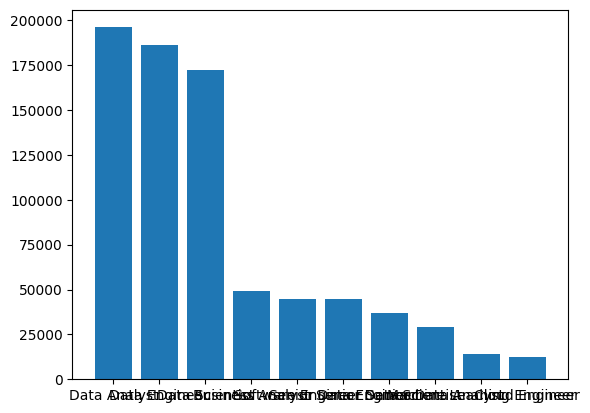

In [18]:
plt.bar(job_counts.index, job_counts.values)
plt.show()

This isn't that readable. Instead, let's only get the top 3 most requested job titles in the United States. We're only getting the top 3 because that's all that fits on the x-axis without having to customize the x-axis using something else (which we will do in a bit).

<BarContainer object of 3 artists>

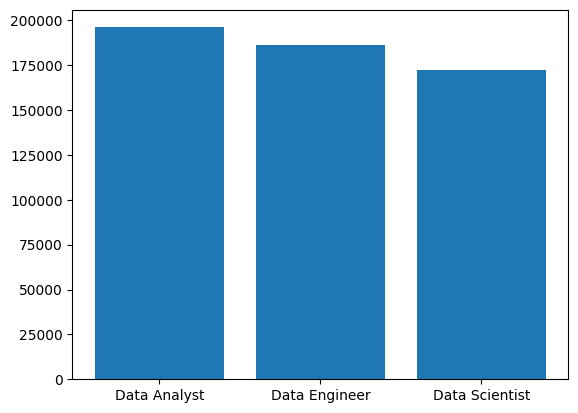

In [19]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df['job_title_short'].value_counts().head(3) # Only top 3

# Plot the job counts
plt.bar(job_counts.index, job_counts.values)

### Horizontal Bar Plot

#### Notes

* This is similar to a bar chart but the bars are horizontal.
* Even the syntax is similar: `plt.barh(categories, values)`.
* It's useful when chart labels are lengthy (like in our previous example).
* Good for comparing the size of categories or when the text labels are too long to fit well under a vertical bar.

#### Example

Let's redo our graph and make it a horizontal bar chart instead. This way we can look at more jobs without having to format the axis. Let's look at the top 5.

In [20]:
# Get the value counts of the job titles for the filtered DataFrame
job_counts = df['job_title_short'].value_counts()
job_counts = job_counts.head(6)
job_counts = job_counts.sort_values(ascending=True)

job_counts

,count
job_title_short,
Senior Data Engineer,44563
Software Engineer,44929
Business Analyst,49063
Data Scientist,172286
Data Engineer,186241
Data Analyst,196075


For readability, you can use parenthesis instead if chaining multiple methods

In [21]:
job_counts = (
    df['job_title_short']
    .value_counts()
    .head(6)
    .sort_values(ascending=True)
)

job_counts

,count
job_title_short,
Senior Data Engineer,44563
Software Engineer,44929
Business Analyst,49063
Data Scientist,172286
Data Engineer,186241
Data Analyst,196075


Let's plot it!

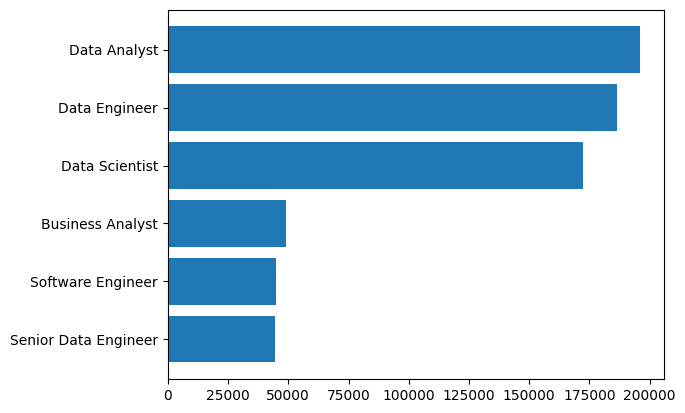

In [22]:
plt.barh(job_counts.index, job_counts)  # Changed this to be a horizontal bar chart instead
plt.show()

### Note - `plt.show()`

* You may see `plt.show()` at the bottom of some plots, but it's not required in Jupyter Notebooks [per the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html):
> **Auto-show in jupyter notebooks**  
> The jupyter backends (activated via %matplotlib inline, %matplotlib notebook, or %matplotlib widget), call show() at the end of every cell by default. Thus, you usually don't have to call it explicitly there.
* TLDR: Inside of Jupyter Notebooks, the functionality automatically shows the graph